<a href="https://colab.research.google.com/github/nachomendoza97/Data-Industrial/blob/main/Proyecto_4_Analisis_ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total de items: 50
categoria
A    10
B    17
C    23
Name: count, dtype: int64


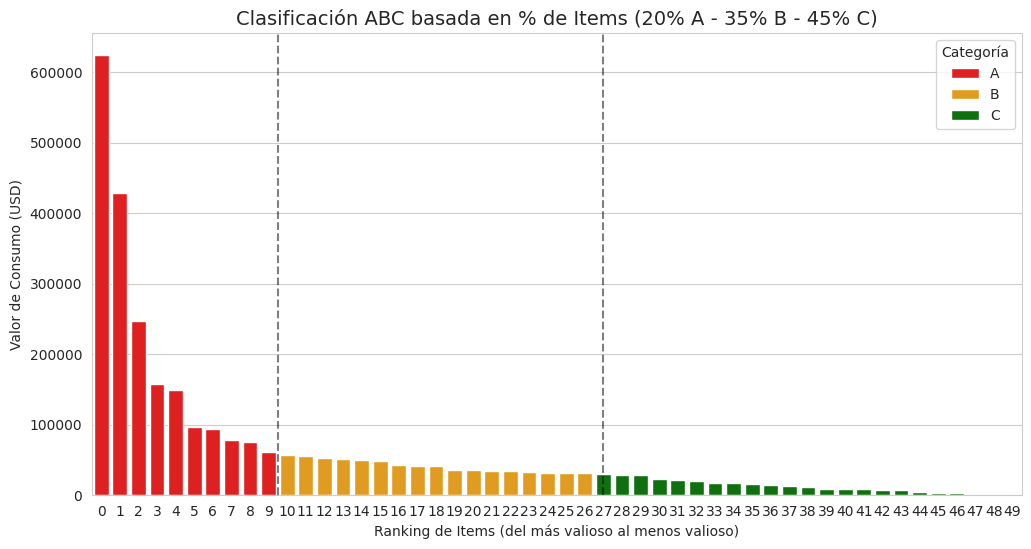

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. (Usamos los datos generados anteriormente o creamos unos rápidos)
n_items = 50
df = pd.DataFrame({
    'sku': [f'ITEM-{i+1:03d}' for i in range(n_items)],
    'valor_consumo': np.random.lognormal(mean=10, sigma=1.5, size=n_items)
})

# 2. ORDENAR por valor (Fundamental para que el 20% de items sea el de mayor valor)
df = df.sort_values('valor_consumo', ascending=False).reset_index(drop=True)

# 3. NUEVA LÓGICA: % Acumulado de ITEMS
# Creamos una columna que va de 1/50, 2/50... hasta 50/50 (1.0)
df['%_acum_items'] = (df.index + 1) / len(df)

# 4. PARTICIÓN SEGÚN TUS REQUISITOS
# A: 20% de items | B: siguiente 35% (total 55%) | C: el resto
def clasificar_por_items(p):
    if p <= 0.20:
        return 'A'
    elif p <= 0.55: # 0.20 + 0.35 = 0.55
        return 'B'
    else:
        return 'C'

df['categoria'] = df['%_acum_items'].apply(clasificar_por_items)

# 5. VERIFICACIÓN DE RESULTADOS
print(f"Total de items: {len(df)}")
print(df['categoria'].value_counts().sort_index())
# Debería dar: A=10 items (20%), B=17 o 18 items (35%), C=22 o 23 items (45%)

# 6. VISUALIZACIÓN PROFESIONAL
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gráfico de barras coloreado por categoría
ax = sns.barplot(x=df.index, y='valor_consumo', hue='categoria', data=df, dodge=False, palette={'A': 'red', 'B': 'orange', 'C': 'green'})

# Añadimos líneas verticales para marcar las "fronteras" de clase
plt.axvline(x=len(df)*0.20 - 0.5, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=len(df)*0.55 - 0.5, color='black', linestyle='--', alpha=0.5)

plt.title('Clasificación ABC basada en % de Items (20% A - 35% B - 45% C)', fontsize=14)
plt.xlabel('Ranking de Items (del más valioso al menos valioso)')
plt.ylabel('Valor de Consumo (USD)')
plt.legend(title='Categoría')
plt.show()